<a href="https://colab.research.google.com/github/mnlslzr/Clasificador_de_arritmias/blob/master/Prueba_lectura_datos1.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 37.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.2 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.
Procesando registro 100...
Procesando registro 101...
Procesando registro 102...
Procesando registro 103...
Procesando registro 104...
Proc

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 67s 28ms/step - accuracy: 0.3412 - loss: 1.2147 - val_accuracy: 0.5824 - val_loss: 0.9290
Epoch 2/50
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 63s 28ms/step - accuracy: 0.6665 - loss: 0.5810 - val_accuracy: 0.7094 - val_loss: 0.8175
Epoch 3/50
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 63s 28ms/step - accuracy: 0.7916 - loss: 0.4637 - val_accuracy: 0.7274 - val_loss: 0.6512
Epoch 4/50
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 61s 27ms/step - accuracy: 0.8268 - loss: 0.3841 - val_accuracy: 0.8418 - val_loss: 0.4252
Epoch 5/50
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 63s 28ms/step - accuracy: 0.8585 - loss: 0.3184 - val_accuracy: 0.8661 - val_loss: 0.4073
Epoch 6/50
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.8864 - loss: 0.2636 - val_accuracy: 0.8394 - val_loss: 0.4135
Epoch 7/50
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 62s 28ms/step - accuracy: 0.9022 - loss: 0.2174 - val_accuracy: 0.7949 - val_loss: 0.5862
Epoch 8/50
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9073 -

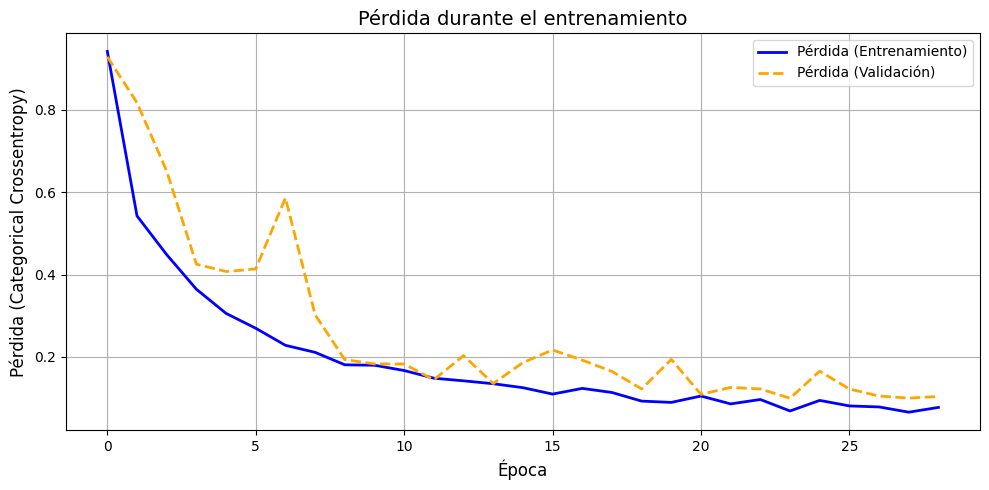

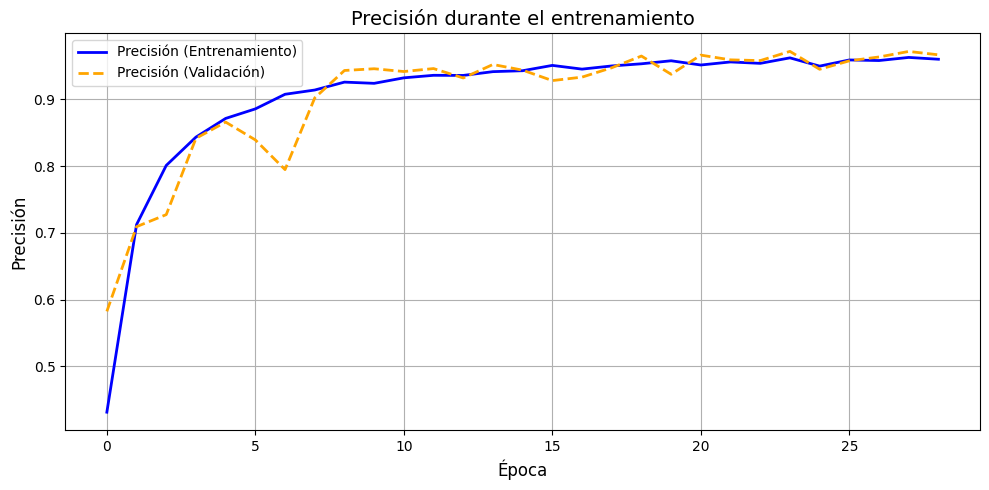

704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step

Reporte de clasificación:
              precision    recall  f1-score   support

           F       0.38      0.94      0.54       132
           N       1.00      0.97      0.98     18041
           Q       0.97      0.98      0.97      2297
           S       0.72      0.93      0.81       527
           V       0.95      0.96      0.95      1515

    accuracy                           0.97     22512
   macro avg       0.80      0.96      0.85     22512
weighted avg       0.98      0.97      0.97     22512



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


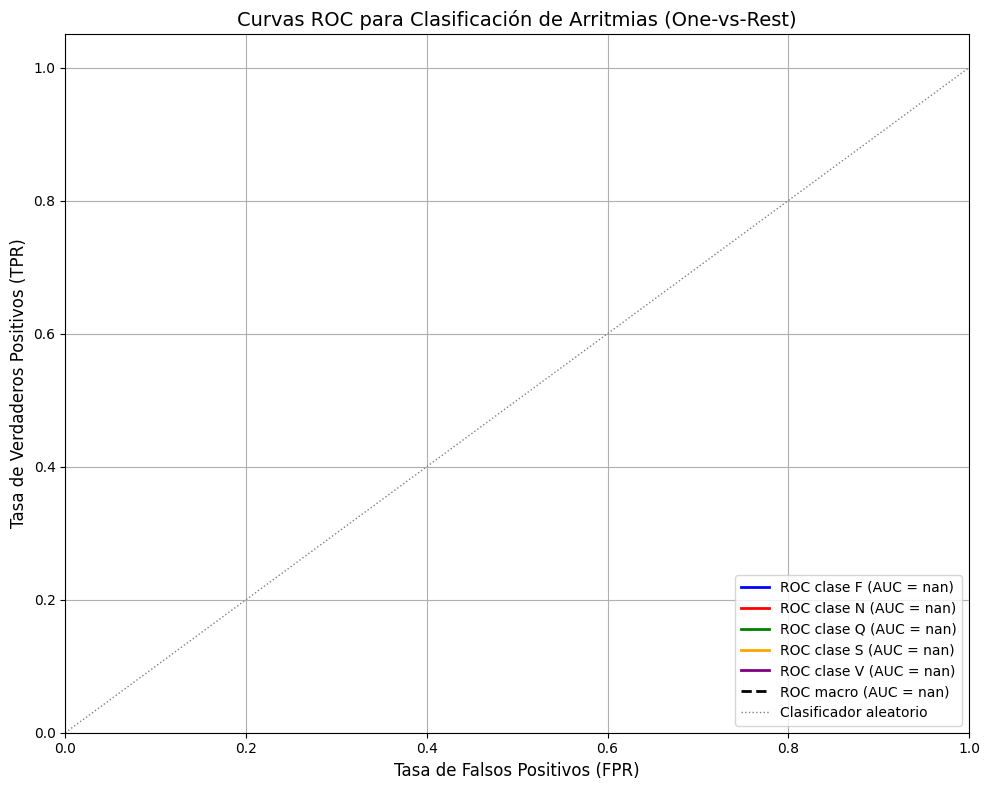


AUC por clase:
Clase F: nan
Clase N: nan
Clase Q: nan
Clase S: nan
Clase V: nan
AUC macro: nan


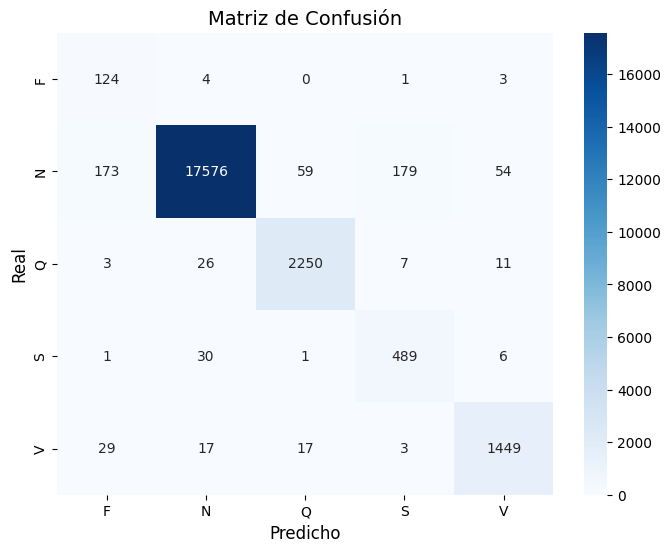

In [1]:
!pip install wfdb scipy numpy tensorflow scikit-learn matplotlib

import numpy as np
import wfdb
from scipy.signal import resample, butter, filtfilt, iirnotch
from sklearn.preprocessing import LabelEncoder, label_binarize
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Input, UpSampling1D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from itertools import cycle
from imblearn.over_sampling import SMOTE
import seaborn as sns



# --- Funciones de preprocesamiento ---
def filtro_pasa_banda(senal, fs, lowcut=0.5, highcut=40.0, orden=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(orden, [low, high], btype='band')
    return filtfilt(b, a, senal)

def filtro_notch(senal, fs, freq_notch=60.0, Q=30.0):
    w0 = freq_notch / (fs / 2)
    b, a = iirnotch(w0, Q)
    return filtfilt(b, a, senal)

def normalizar_segmento(segmento):
    min_val = np.min(segmento)
    max_val = np.max(segmento)
    if max_val == min_val:
        return segmento - min_val
    return (segmento - min_val) / (max_val - min_val)

def ajustar_frecuencia(senal, frecuencia_original, frecuencia_deseada=360):
    if frecuencia_original == frecuencia_deseada:
        return senal
    num_muestras_nuevo = int(len(senal) * frecuencia_deseada / frecuencia_original)
    return resample(senal, num_muestras_nuevo)

def segmentar_y_normalizar(senal, picos, tamano_ventana=256): # Adjusted window size to be a power of 2
    segmentos = []
    indices_validos = []
    for i, pico in enumerate(picos):
        inicio = pico - tamano_ventana // 2
        fin = pico + tamano_ventana // 2
        if inicio >= 0 and fin <= len(senal):
            segmento = senal[inicio:fin]
            if len(segmento) == tamano_ventana:
                segmento_norm = normalizar_segmento(segmento)
                segmentos.append(segmento_norm)
                indices_validos.append(i)
    return np.array(segmentos), indices_validos

# --- Cargar y procesar MIT-BIH ---
registros = [str(i) for i in range(100, 235)]
segmentos_total = []
etiquetas_total = []
frecuencia_mit = 360

for reg in registros:
    try:
        print(f"Procesando registro {reg}...")
        record_mit = wfdb.rdrecord(reg, pn_dir='mitdb/')
        annotation_mit = wfdb.rdann(reg, extension='atr', pn_dir='mitdb/')
        senal_mit = record_mit.p_signal[:, 0]
        picos_mit = annotation_mit.sample
        etiquetas_mit = annotation_mit.symbol

        senal_mit_ajustada = ajustar_frecuencia(senal_mit, frecuencia_mit)
        senal_mit_filtrada = filtro_pasa_banda(senal_mit_ajustada, fs=frecuencia_mit)
        senal_mit_filtrada = filtro_notch(senal_mit_filtrada, fs=frecuencia_mit)

        segmentos_reg, indices_validos = segmentar_y_normalizar(senal_mit_filtrada, picos_mit)
        etiquetas_reg = [etiquetas_mit[i] for i in indices_validos]

        segmentos_total.extend(segmentos_reg)
        etiquetas_total.extend(etiquetas_reg)
    except Exception as e:
        print(f"Error al procesar registro {reg}: {str(e)}")
        continue

segmentos_total = np.array(segmentos_total)
etiquetas_total = np.array(etiquetas_total)
print(f"Total de segmentos procesados: {len(segmentos_total)}")

# --- Agrupar etiquetas AAMI ---
mapeo_aami = {'N': 'N', 'L': 'N', 'R': 'N', 'A': 'S', 'S': 'S', 'J': 'S', 'V': 'V', 'E': 'V', 'F': 'F', 'Q': 'Q', 'f': 'Q', '/': 'Q', '+': 'Q'}
etiquetas_aami = [mapeo_aami.get(e, 'Q') for e in etiquetas_total]
from collections import Counter
print("Distribución de clases AAMI:", Counter(etiquetas_aami))

# Convertir a one-hot y obtener etiquetas numéricas
codificador = LabelEncoder()
etiquetas_numeros = codificador.fit_transform(etiquetas_aami)
etiquetas_onehot = to_categorical(etiquetas_numeros)

# --- Calcular pesos de clases ---
pesos = class_weight.compute_class_weight('balanced', classes=np.unique(etiquetas_numeros), y=etiquetas_numeros)
pesos_dict = dict(enumerate(pesos))
print("Pesos de clases:", pesos_dict)

# --- Autoencoder convolucional ---
input_shape = (256, 1) # Adjusted input shape
input_signal = Input(shape=input_shape)

# Encoder
x = Conv1D(32, kernel_size=5, activation='relu', padding='same')(input_signal)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(16, kernel_size=5, activation='relu', padding='same')(x)
encoded = MaxPooling1D(pool_size=2)(x) # Output shape will be (64, 16)

# Decoder
x = Conv1D(16, kernel_size=5, activation='relu', padding='same')(encoded)
x = UpSampling1D(size=2)(x)
x = Conv1D(32, kernel_size=5, activation='relu', padding='same')(x)
x = UpSampling1D(size=2)(x) # Output shape will be (256, 32)
decoded = Conv1D(1, kernel_size=3, activation='linear', padding='same')(x)

autoencoder = Model(input_signal, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

encoder = Model(input_signal, encoded)

# Entrenar autoencoder
X_auto = segmentos_total[..., np.newaxis]
X_train_auto, X_val_auto = train_test_split(X_auto, test_size=0.2, random_state=42)
autoencoder.fit(X_train_auto, X_train_auto, epochs=20, batch_size=32, validation_data=(X_val_auto, X_val_auto))

# Extraer representaciones latentes
encoded_segments = encoder.predict(X_auto)
print("Forma de las representaciones latentes:", encoded_segments.shape)

# SMOTE

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(encoded_segments, etiquetas_onehot, test_size=0.2, random_state=42)


# Aplanar X_train para SMOTE
X_train_flat = X_train.reshape(X_train.shape[0], -1)
y_train_labels = np.argmax(y_train, axis=1)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_flat, y_train_labels)

# Reconstruir la forma 3D
X_train_res = X_train_res.reshape(-1, X_train.shape[1], X_train.shape[2])

# Convertir etiquetas de vuelta a one-hot
y_train_res = to_categorical(y_train_res, num_classes=len(codificador.classes_))


# --- Modelo híbrido CNN-LSTM ---
modelo_hibrido = Sequential([
    Conv1D(32, kernel_size=5, activation='relu', input_shape=(encoded_segments.shape[1], encoded_segments.shape[2])), # Adjusted input shape
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(128, return_sequences=False),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
modelo_hibrido.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



# EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
historia = modelo_hibrido.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
                              class_weight=pesos_dict, callbacks=[early_stopping])

# --- Evaluar ---
perdida, precision = modelo_hibrido.evaluate(X_test, y_test)
print(f"Precisión en prueba: {precision * 100:.2f}%")

# --- Generar gráficas de pérdida y precisión ---
#plt.style.use('seaborn')  # Estilo más limpio

# Gráfica de pérdida
plt.figure(figsize=(10, 5))
plt.plot(historia.history['loss'], label='Pérdida (Entrenamiento)', color='blue', linewidth=2)
plt.plot(historia.history['val_loss'], label='Pérdida (Validación)', color='orange', linestyle='--', linewidth=2)
plt.title('Pérdida durante el entrenamiento', fontsize=14)
plt.xlabel('Época', fontsize=12)
plt.ylabel('Pérdida (Categorical Crossentropy)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/perdida.png')  # Guardar en Colab
plt.show()

# Gráfica de precisión
plt.figure(figsize=(10, 5))
plt.plot(historia.history['accuracy'], label='Precisión (Entrenamiento)', color='blue', linewidth=2)
plt.plot(historia.history['val_accuracy'], label='Precisión (Validación)', color='orange', linestyle='--', linewidth=2)
plt.title('Precisión durante el entrenamiento', fontsize=14)
plt.xlabel('Época', fontsize=12)
plt.ylabel('Precisión', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/precision.png')  # Guardar en Colab
plt.show()

# --- Evaluación detallada por clase ---
y_pred = modelo_hibrido.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
print("\nReporte de clasificación:")
print(classification_report(y_test_classes, y_pred_classes, target_names=codificador.classes_))

# --- Curvas ROC para multi-clase (one-vs-rest) ---

# Binarizar las etiquetas para one-vs-rest
y_test_bin = label_binarize(y_test_classes, classes=codificador.classes_)
n_classes = y_test_bin.shape[1]

# Obtener probabilidades de y_pred (ya las tienes)
# y_pred tiene forma (n_samples, n_classes)

# Calcular ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el promedio macro (promedio de todas las curvas)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Graficar las curvas ROC
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])  # Colores para cada clase
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC clase {codificador.classes_[i]} (AUC = {roc_auc[i]:0.2f})')
plt.plot(fpr["macro"], tpr["macro"], color='black', linestyle='--', lw=2,
         label=f'ROC macro (AUC = {roc_auc["macro"]:0.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle=':', label='Clasificador aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curvas ROC para Clasificación de Arritmias (One-vs-Rest)', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/curvas_roc.png')  # Guardar en Colab o tu entorno
plt.show()

# Imprimir AUC por clase y macro
print("\nAUC por clase:")
for i in range(n_classes):
    print(f"Clase {codificador.classes_[i]}: {roc_auc[i]:.2f}")
print(f"AUC macro: {roc_auc['macro']:.2f}")
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=codificador.classes_, yticklabels=codificador.classes_)
plt.title('Matriz de Confusión', fontsize=14)
plt.xlabel('Predicho', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.savefig('/content/matriz_confusion.png')
plt.show()